In [ ]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
import keras

In [ ]:
#Mount Google drive to save model
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
#from keras import utils as np_utils
from keras.utils import np_utils
batch_size = 128
num_classes = 10
epochs = 25
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize to 0 to 1 range
X_train /= 255
X_test /= 255

print('Number of images in training Set: ', X_train.shape[0], )
print('Number of images in training Set: ', X_test.shape[0], )
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)


print('Training set size:', X_train.shape)
print('Testing set size:', X_test.shape)
print('Training label size;',y_train.shape)
print('testing  label size;',y_test.shape)


Number of images in training Set:  60000
Number of images in training Set:  10000
Training set size: (60000, 784)
Testing set size: (10000, 784)
Training label size; (60000, 10)
testing  label size; (10000, 10)


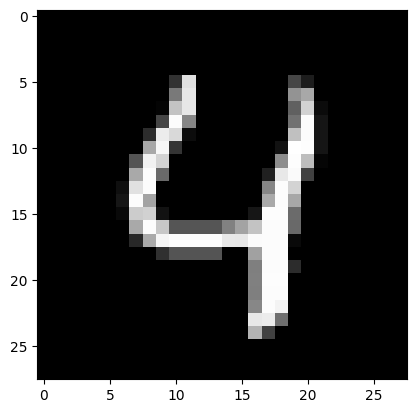

In [ ]:

plt.imshow(X_test[4:5].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
y_test[4:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
X_test[4:5]

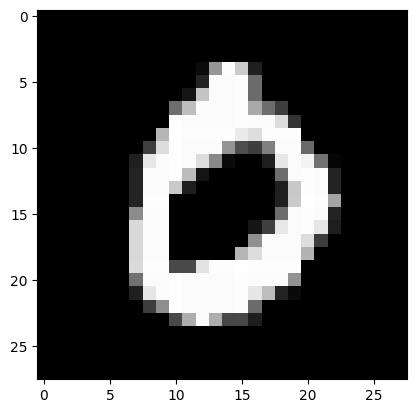

In [ ]:
plt.imshow(X_test[3:4].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
print("Label:",y_test[3:4])

Label: [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


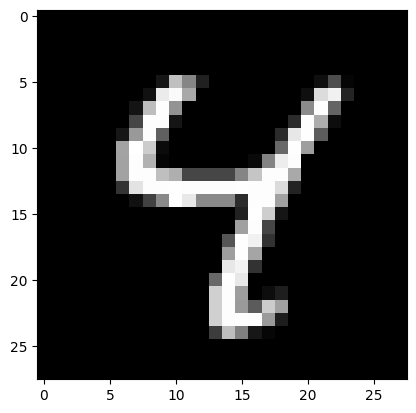

In [ ]:
plt.imshow(X_test[6:7].reshape(28,28), cmap='gray')
plt.show()

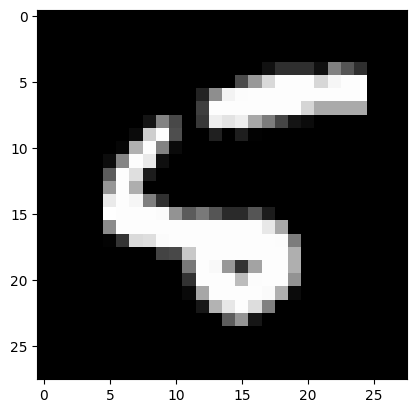

In [ ]:
plt.imshow(X_test[8:9].reshape(28,28), cmap='gray')
plt.show()

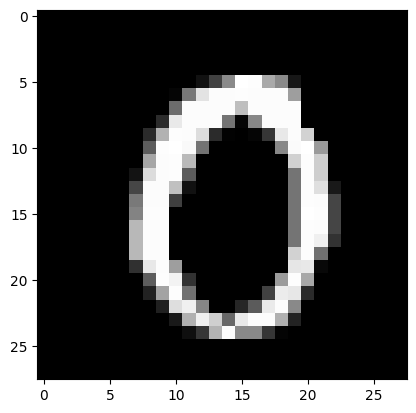

In [ ]:
plt.imshow(X_test[13:14].reshape(28,28), cmap='gray')
plt.show()

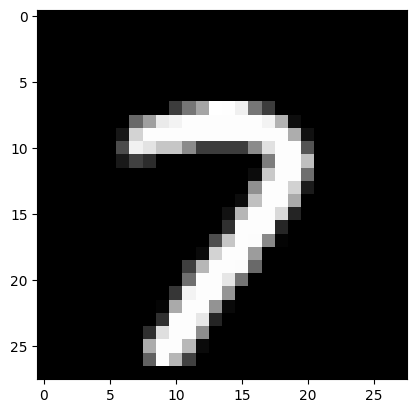

In [ ]:
plt.imshow(X_test[223:224].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# NN Model structure
"""From these core areas, neural networks were applied to applications:
 sentiment analysis, speech recognition, information retrieval/extraction,
  text classification/generation, summarization, question answering
  , and machine translation."""
  
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


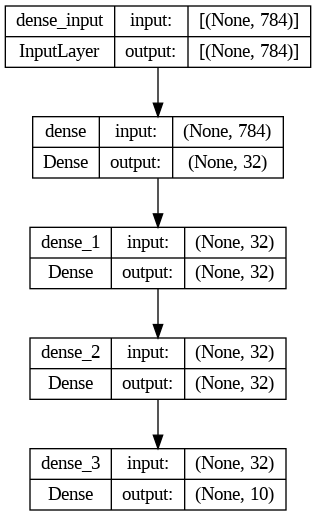

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

Shape of First Layer (784, 32)
Visualization of First Layer


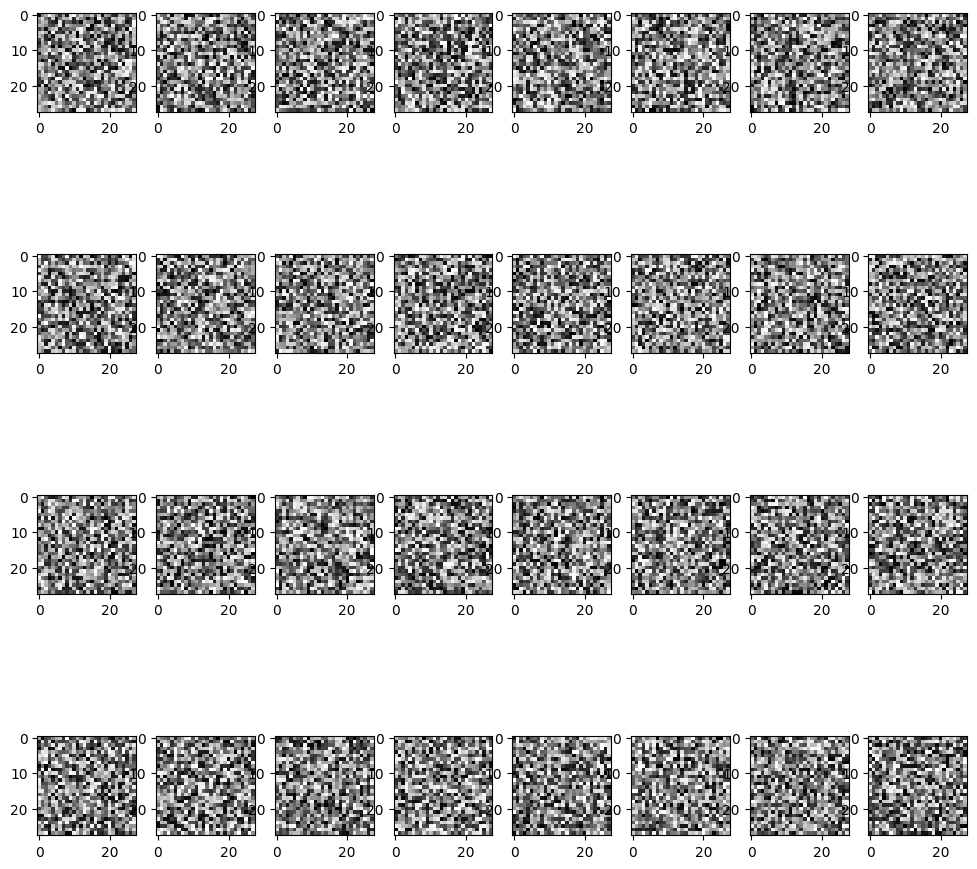

In [ ]:
#Weights before training
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
#Model compilation
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=["accuracy"])

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2)

Epoch 1/25
469/469 - 2s - loss: 1.6964 - accuracy: 0.4731 - 2s/epoch - 4ms/step
Epoch 2/25
469/469 - 1s - loss: 0.7865 - accuracy: 0.7810 - 1s/epoch - 3ms/step
Epoch 3/25
469/469 - 1s - loss: 0.4967 - accuracy: 0.8734 - 1s/epoch - 3ms/step
Epoch 4/25
469/469 - 1s - loss: 0.3674 - accuracy: 0.9039 - 1s/epoch - 2ms/step
Epoch 5/25
469/469 - 1s - loss: 0.2947 - accuracy: 0.9223 - 1s/epoch - 3ms/step
Epoch 6/25
469/469 - 1s - loss: 0.2482 - accuracy: 0.9333 - 1s/epoch - 2ms/step
Epoch 7/25
469/469 - 2s - loss: 0.2159 - accuracy: 0.9413 - 2s/epoch - 4ms/step
Epoch 8/25
469/469 - 2s - loss: 0.1922 - accuracy: 0.9476 - 2s/epoch - 4ms/step
Epoch 9/25
469/469 - 1s - loss: 0.1746 - accuracy: 0.9514 - 1s/epoch - 3ms/step
Epoch 10/25
469/469 - 1s - loss: 0.1608 - accuracy: 0.9551 - 1s/epoch - 2ms/step
Epoch 11/25
469/469 - 1s - loss: 0.1489 - accuracy: 0.9582 - 1s/epoch - 3ms/step
Epoch 12/25
469/469 - 1s - loss: 0.1396 - accuracy: 0.9608 - 1s/epoch - 2ms/step
Epoch 13/25
469/469 - 1s - loss: 0.13

In [ ]:
# save model and architecture to single file
model.save('/content/drive/My Drive/sem_6/MNISTANN.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________
Saved model to disk


In [ ]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/sem_6/MNISTANN.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


dict_keys(['loss', 'accuracy'])


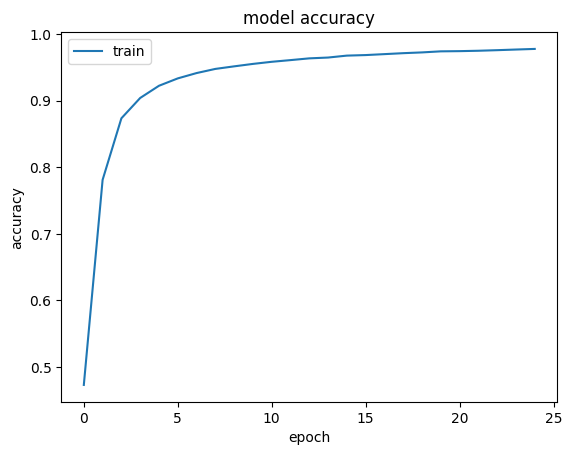

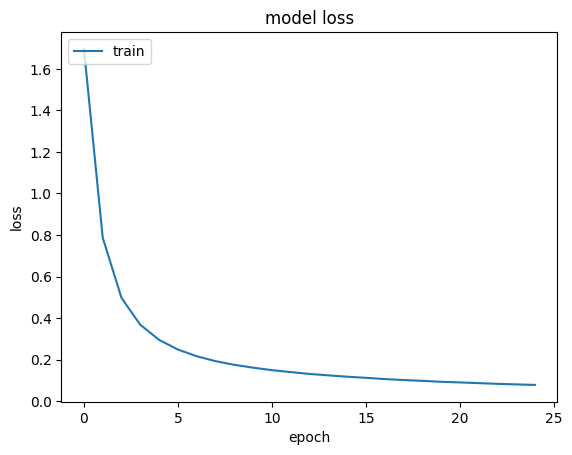

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
313/313 [==============================] - 1s 1ms/step - loss: 0.1299 - accuracy: 0.9632
Test Accuracy: 96.31999731063843


In [ ]:
#Trainig accuracy
y_pred=model.predict(X_train)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

1875/1875 [==============================] - 4s 2ms/step
[5 0 4 ... 5 6 8]
(60000,)


In [ ]:
# Original Training  label
y_train_original=np.argmax(y_train,axis=1)
print(y_train_original)

[5 0 4 ... 5 6 8]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_train_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_train_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5923
           1       0.99      0.99      0.99      6742
           2       0.96      0.99      0.97      5958
           3       0.97      0.97      0.97      6131
           4       0.98      0.98      0.98      5842
           5       0.99      0.96      0.97      5421
           6       0.99      0.98      0.99      5918
           7       0.98      0.98      0.98      6265
           8       0.95      0.99      0.97      5851
           9       0.98      0.96      0.97      5949

    accuracy                           0.98     60000
   macro avg       0.98      0.98      0.98     60000
weighted avg       0.98      0.98      0.98     60000

Confusion matrix 
[[5857    0   27    3    3    5   10    0   15    3]
 [   0 6646   37    3   12    0    2    7   34    1]
 [  13    4 5875   12   11    1    3   11   26    2]
 [   6    2   57 5962    0   28    0   18

In [ ]:
# testing accuracy
y_pred=model.predict(X_test)

y_pred=np.argmax(y_pred,axis=1)
print(y_pred)
print(y_pred.shape)

313/313 [==============================] - 1s 1ms/step
[7 2 1 ... 4 5 6]
(10000,)


In [ ]:
# Original testing Label
y_test_original=np.argmax(y_test,axis=1)
y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================")
print(classification_report(y_test_original, y_pred))
print("Confusion matrix \n=======================")
print(confusion_matrix(y_test_original, y_pred))

Classification report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.95      0.96      0.96      1032
           3       0.95      0.96      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.93      0.95       892
           6       0.98      0.97      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.93      0.97      0.95       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Confusion matrix 
[[ 965    0    6    0    0    2    2    1    4    0]
 [   0 1118    3    2    0    0    1    1   10    0]
 [   7    1  994    7    3    0    3    6   11    0]
 [   0    0    9  973    0    5    0   10

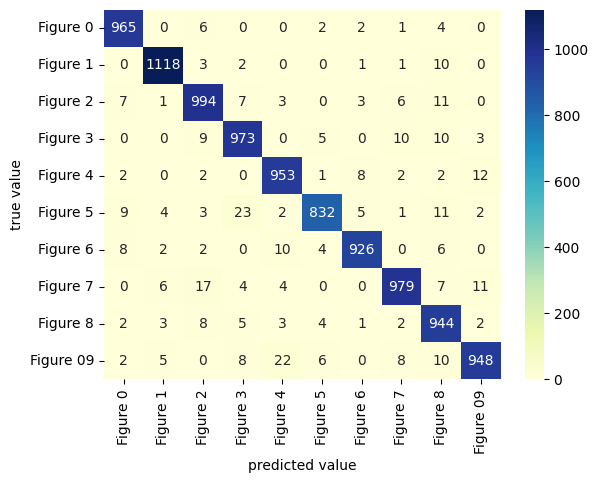

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_original,y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g', xticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09'], 
            yticklabels=['Figure 0','Figure 1','Figure 2','Figure 3','Figure 4','Figure 5','Figure 6','Figure 7','Figure 8','Figure 09']); 

plt.xlabel('predicted value')
plt.ylabel('true value');

Shape of First Layer (784, 32)
Visualization of First Layer


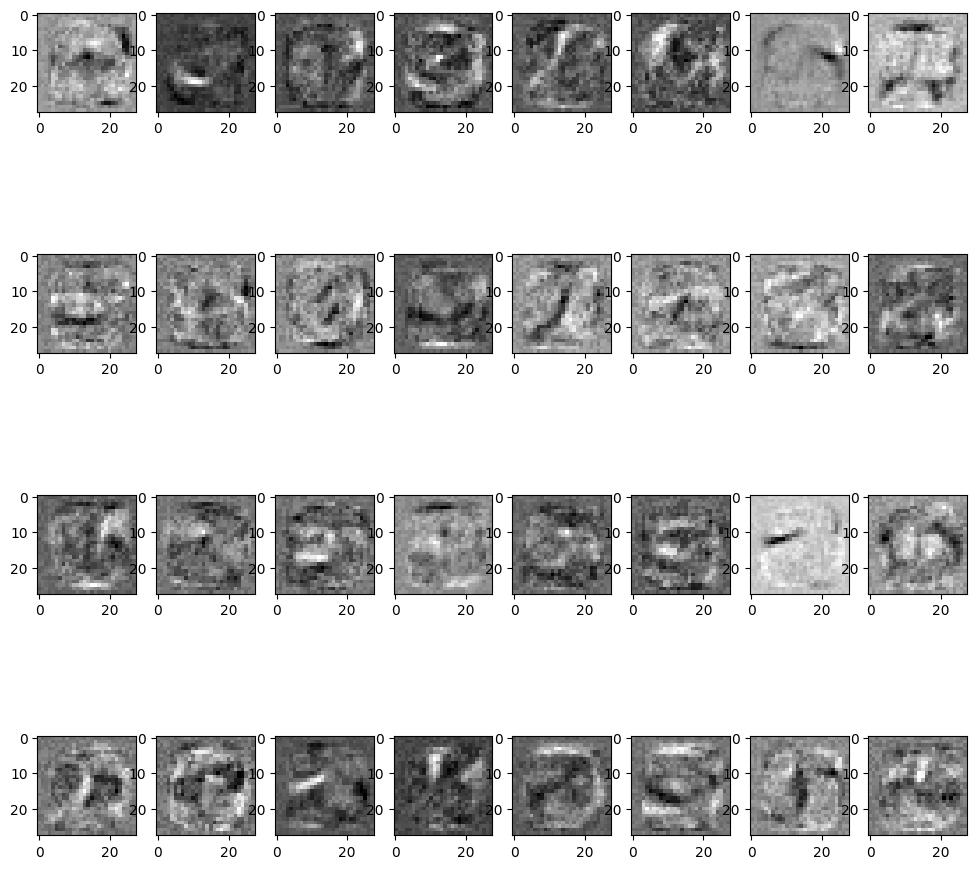

In [ ]:
# Weights after training of First layer
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Shape of Third Layer (32, 10)
Visualization of Third Layer


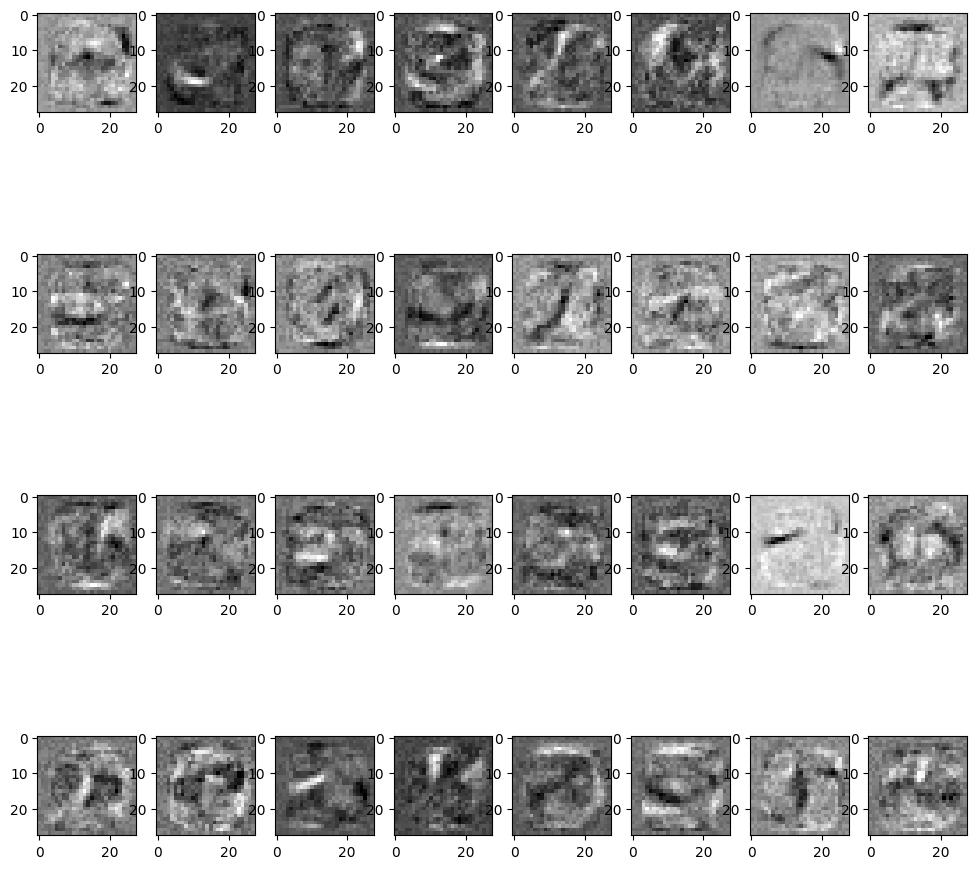

In [ ]:
# Weights after training of Third layer
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer3 = np.array(w[3][0])
print("Shape of Third Layer",layer3.shape)
print("Visualization of Third Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
# Write the testing input and output variables
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.12985634803771973
Test accuracy: 0.9631999731063843


Label: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


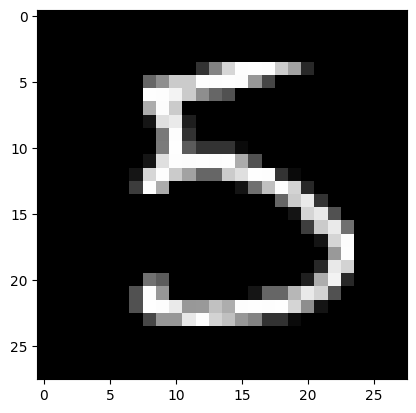

In [ ]:
print("Label:",y_test[15:16])
plt.imshow(X_test[15:16].reshape(28,28), cmap='gray')
plt.show()

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(X_test[15:16])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 38ms/step
Prediction
 [3.8261998e-05 6.5852117e-07 1.5570474e-06 4.0540267e-03 3.7458250e-08
 9.9552923e-01 2.5473307e-07 5.6989529e-06 4.2853735e-05 3.2746376e-04]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving img_1.png to img_1.png


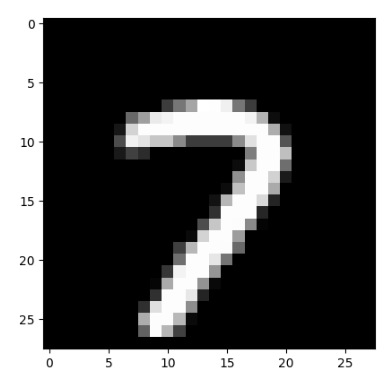

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('img_1.png', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

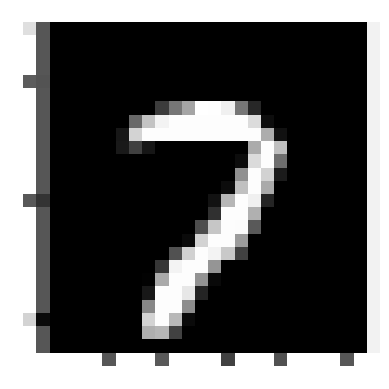

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('img_1.png', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 88ms/step
Prediction Score:
 [2.9062719e-10 2.7651008e-06 8.2812630e-07 2.9304158e-04 1.2534811e-07
 1.9212400e-06 2.2952083e-13 9.9782676e-01 1.0651236e-06 1.8734284e-03]

Thresholded Score:
 [0 0 0 0 0 0 0 1 0 0]

Predicted Digit: 7


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install streamlit==1.1.0

In [2]:
!pip install pyngrok==5.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 680.1/680.1 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-5.2.2-py3-none-any.whl size=19803 sha256=96c3190a21342f01010df158396acc42f6a8b16a36ce967dc58c7288751f0569
  Stored in directory: /root/.cache/pip/wheels/59/43/d0/6512bcc4a32ea8c1b195f8ad0eb80bd8ec161c55b25eb47cea
Successfully built pyngrok


In [3]:
!ngrok authtoken 2CUIKzhhbsoHHk6GUeiens9G5T9_7weiPkL9r6htxRL9UMwZH

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [4]:
%%writefile app.py
import streamlit as st 
from PIL import Image
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.preprocessing import image
import os
from werkzeug.utils import secure_filename
st.set_option('deprecation.showfileUploaderEncoding', False)
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/sem_6/MNISTANN.h5')

html_temp = """
   <div class="" style="background-color:blue;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:40px;color:white;margin-top:10px;">POORNIMA iNSTITUTE OF ENGINEERING & TECHNOLOGY</p></center> 
   <center><p style="font-size:30px;color:white;margin-top:10px;">SUMMER INTERNSHIP 2022</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)
  
st.title("""
        Digit Recognition
         """
         )
file= st.file_uploader("Please upload image", type=("jpg", "png"))

import cv2
from  PIL import Image, ImageOps
def import_and_predict(image_data):
  
  image_resized = cv2.resize(image_data, (28, 28))  
  prediction = model.predict(image_resized.reshape(1,784))
  print('Prediction Score:\n',prediction[0])
  thresholded = (prediction>0.5)*1
  print('\nThresholded Score:\n',thresholded[0])
  print('\nPredicted Digit:',np.where(thresholded == 1)[1][0])
  digit = np.where(thresholded == 1)[1][0]
  #st.image(image_data, use_column_width=True)
  return digit
if file is None:
  st.text("Please upload an Image file")
else:
  image=Image.open(file)
  image=np.array(image)
  #file_bytes = np.asarray(bytearray(file.read()), dtype=np.uint8)
  #image = cv2.imdecode(file_bytes, 1)
  st.image(image,caption='Uploaded Image.', use_column_width=True)
    
if st.button("Predict Digit"):
  result=import_and_predict(image)
  st.success('Model has predicted the image is of  {}'.format(result))
if st.button("About"):
  st.header(" Ishu kumar")
  st.subheader(" of Computer Engineering")
  
html_temp = """
   <div class="" style="background-color:orange;" >
   <div class="clearfix">           
   <div class="col-md-12">
   <center><p style="font-size:20px;color:white;margin-top:10px;">Department of Computer Engineering</p></center> 
   <center><p style="font-size:20px;color:white;margin-top:10px;">Poornima Institute of Engineering & Technology</p></center> 
   </div>
   </div>
   </div>
   """
st.markdown(html_temp,unsafe_allow_html=True)

Writing app.py


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port='8050')
print(url)

In [6]:
!streamlit run --server.port 80 app.py

/bin/bash: streamlit: command not found


In [ ]:
ngrok.kill()